# Title an overview

In [173]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from textwrap import wrap
plt.style.use('fivethirtyeight')

In [51]:
# Import Character Data
character_df = pd.read_excel('coapmank_character_data_clean.xlsx')
character_df = character_df[character_df.score != 'NETR']  # drop rows without score
character_df = character_df.astype({'name':'string', # cast the types for each column
                     'character_trait':'string',
                     'indicator':'string',
                     'evaluator':'string',
                     'score':'int'})
character_df.head()

,name,date,character_trait,indicator,evaluator,score
0,Charles A,2019-11-15,Curiosity,Is eager to explore new things,Student,4
1,Noah B,2019-11-15,Curiosity,Is eager to explore new things,Student,4
2,She'Mille B,2019-11-15,Curiosity,Is eager to explore new things,Student,5
3,Nathan C,2019-11-15,Curiosity,Is eager to explore new things,Student,4
4,Jayden C,2019-11-15,Curiosity,Is eager to explore new things,Student,3


In [52]:
# Import Academic Data
academic_df = pd.read_excel('coapmank_academic_data_clean.xlsx')
academic_df = academic_df.astype({'name':'string',
                                 'standard':'string',
                                 'mastery':'float'})
academic_df.head()

,name,standard,mastery
0,Charles A,Limits.1B.Estimate,1.0
1,Noah B,Limits.1B.Estimate,1.0
2,She'Mille B,Limits.1B.Estimate,1.0
3,Nathan C,Limits.1B.Estimate,1.0
4,Jayden C,Limits.1B.Estimate,1.0


In [63]:
# Import Student Data
students_df = pd.read_excel('student_info.xlsx')
students_df = students_df.astype({'name':'string',
                                  'previous_course':'string'})
students_df.head()

,name,period,previous_course,previous_course_grade
0,Beverly G,1,AP Calculus AB,90
1,Brianna T,1,AP Calculus AB,87
2,Bridrich Q,1,Pre-AP Calculus,76
3,Cionna S,1,AP Calculus AB,90
4,Deja S,1,Pre-AP Calculus,79


In [62]:
# Import Standards Data
standard_df = pd.read_excel('standards_question_count.xlsx')
standard_df.astype({'standard':'string'})
standard_df.head()

,standard,total questions,total points
0,Limits.1A.Symbol,0,0
1,Limits.1B.Estimate,1,1
2,Limits.1C.Determine,6,7
3,Limits.1D.Behavior,3,3
4,Limits.2A.Continuity,2,3


In [64]:
# Average by indicator by date by student
character_df.groupby(['name','date','character_trait','indicator']).agg({'score':[np.mean]})

score
                                                                                                 mean
name          date       character_trait indicator                                                   
Amanda O      2019-11-15 Curiosity       Actively listens to others                          3.500000
                                         Asks and answers questions to deepen understanding  4.000000
                                         Is eager to explore new things                      3.500000
                         Gratitude       Recognizes and shows appreciation for his/her o...  3.000000
                                         Recognizes and shows appreciation for others        3.500000
...                                                                                               ...
Wilschnaida M 2020-01-15 Gratitude       Recognizes and shows appreciation for his/her o...  2.666667
                                         Recognizes and shows appreciation for others        3.333333
                         Grit            Finishes whatever he or she begins                  2.333333
                                         Tries very hard even after experiencing failure     2.000000
                                         Works independently with focus                      3.333333

[712 rows x 1 columns]

In [65]:
# Average by indicator by date
character_df.groupby(['date','indicator']).agg({'score':[np.mean]})

score
                                                                   mean
date       indicator                                                   
2019-11-15 Actively listens to others                          3.433333
           Asks and answers questions to deepen understanding  3.500000
           Finishes whatever he or she begins                  3.400000
           Is eager to explore new things                      3.683333
           Recognizes and shows appreciation for his/her o...  3.250000
           Recognizes and shows appreciation for others        3.450000
           Tries very hard even after experiencing failure     3.383333
           Works independently with focus                      3.483333
2020-01-15 Actively listens to others                          3.788889
           Asks and answers questions to deepen understanding  3.744444
           Finishes whatever he or she begins                  3.744444
           Is eager to explore new things                      3.666667
           Recognizes and shows appreciation for his/her o...  3.766667
           Recognizes and shows appreciation for others        3.688889
           Tries very hard even after experiencing failure     3.644444
           Works independently with focus                      4.011111
2020-03-15 Actively listens to others                          3.885057
           Asks and answers questions to deepen understanding  3.781609
           Finishes whatever he or she begins                  3.482759
           Is eager to explore new things                      3.827586
           Recognizes and shows appreciation for his/her o...  3.563218
           Recognizes and shows appreciation for others        3.712644
           Tries very hard even after experiencing failure     3.632184
           Works independently with focus                      3.793103

In [66]:
# Average by character trait by date
character_df.groupby(['date','character_trait']).agg({'score':[np.mean]})

score
                                mean
date       character_trait          
2019-11-15 Curiosity        3.538889
           Gratitude        3.350000
           Grit             3.422222
2020-01-15 Curiosity        3.733333
           Gratitude        3.727778
           Grit             3.800000
2020-03-15 Curiosity        3.831418
           Gratitude        3.637931
           Grit             3.636015

In [67]:
# Student averages for each trait for final date
character_df[character_df.date == '2020-03-15'].groupby(['name','character_trait']).agg({'score':[np.mean]})

score
                                 mean
name        character_trait          
Amanda O    Curiosity        3.111111
            Gratitude        3.333333
            Grit             3.222222
Angel S     Curiosity        4.333333
            Gratitude        3.500000
...                               ...
She'Mille B Gratitude        3.833333
            Grit             3.555556
Simone M    Curiosity        4.222222
            Gratitude        4.000000
            Grit             2.888889

[87 rows x 1 columns]

In [92]:
# Create a separate data from for each character trait
curiosity_df = character_df[character_df.character_trait == 'Curiosity']
grit_df = character_df[character_df.character_trait == 'Grit']
gratitude_df = character_df[character_df.character_trait == 'Gratitude']

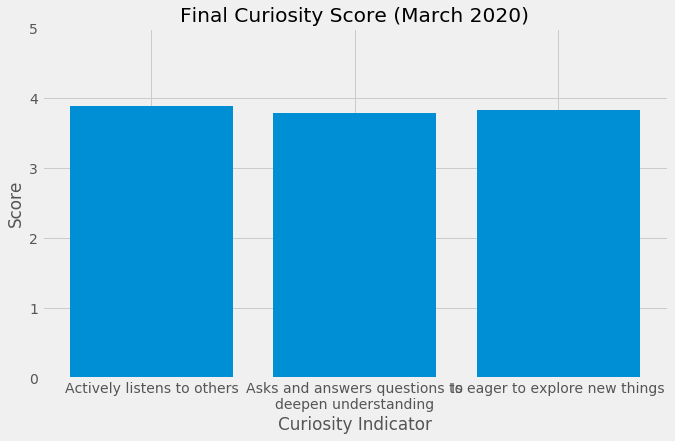

In [174]:
## Visualization of average final score by indicator
df_temp = curiosity_df[curiosity_df.date == '2020-03-15'].groupby(['indicator']).agg({'score':np.mean})

indicators = df_temp.index
indicators = [ '\n'.join(wrap(i,30)) for i in indicators]
x = np.arange(3)
width = 0.8

fig, ax = plt.subplots(figsize = (10,6))
plt.bar(x, df_temp.score, width)
ax.set_ylim([0,5])
ax.set(title='Final Curiosity Score (March 2020)', xlabel = 'Curiosity Indicator', ylabel = 'Score')
ax.set_xticks(x)
ax.set_xticklabels(indicators, wrap = True)
plt.show()

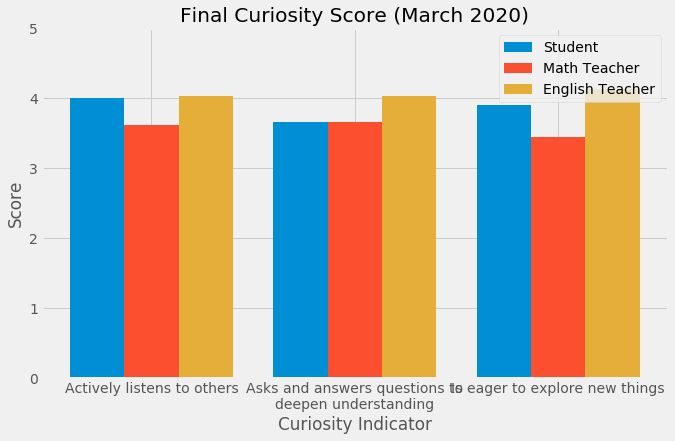

In [175]:
## Visualization of average of final score by evaluation and indicator

df_temp1 = curiosity_df[(curiosity_df.date == '2020-03-15') & (curiosity_df.evaluator == 'Student')].groupby(['indicator']).agg({'score':np.mean})
df_temp2 = curiosity_df[(curiosity_df.date == '2020-03-15') & (curiosity_df.evaluator == 'Math Teacher')].groupby(['indicator']).agg({'score':np.mean})
df_temp3 = curiosity_df[(curiosity_df.date == '2020-03-15') & (curiosity_df.evaluator == 'English Teacher')].groupby(['indicator']).agg({'score':np.mean})

indicators = df_temp1.index
indicators = [ '\n'.join(wrap(i,30)) for i in indicators]
x = np.arange(3)
width = 0.8/3

fig, ax = plt.subplots(figsize = (10,6))
ax.bar(x-width, df_temp1.score, width, label='Student')
ax.bar(x, df_temp2.score, width, label='Math Teacher')
ax.bar(x+width, df_temp3.score, width, label='English Teacher')
ax.set_ylim([0,5])
ax.set_xticks(x)
ax.set_xticklabels(indicators, wrap = True)
ax.set(title='Final Curiosity Score (March 2020)', xlabel = 'Curiosity Indicator', ylabel = 'Score')
ax.legend()
plt.show()

No handles with labels found to put in legend.


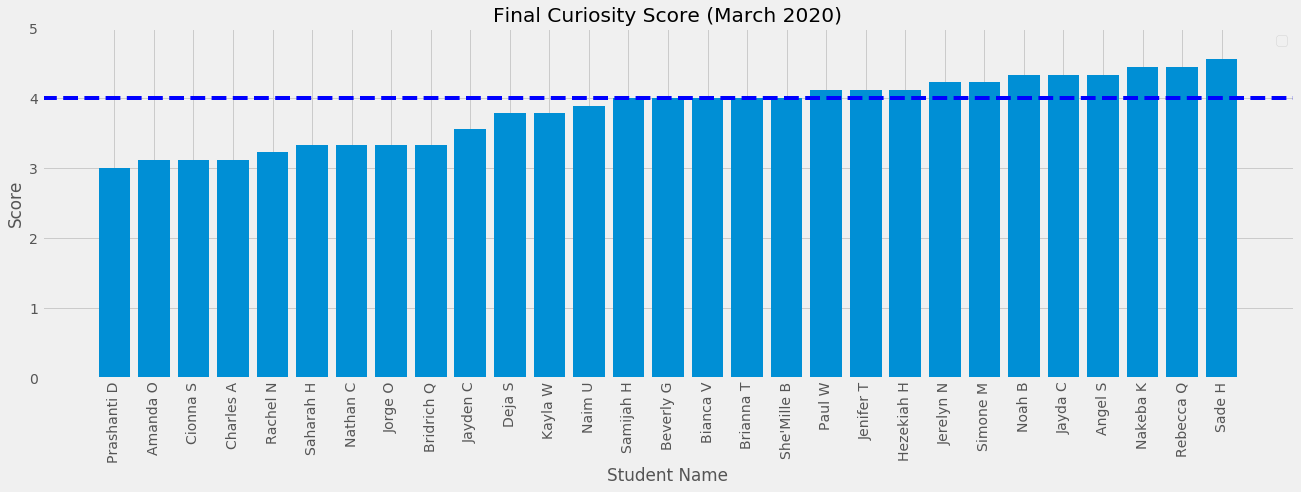

In [176]:
## Visualization of all student scores by name
df_temp = curiosity_df[curiosity_df.date == '2020-03-15'].groupby('name').agg({'score':np.mean}).sort_values('score')
df_temp.head()

names = df_temp.index
x = np.arange(names.size)

fig, ax = plt.subplots(figsize = (20,6))
ax.bar(names, df_temp.score,)
ax.set_ylim([0,5])
ax.set_xticks(x)
ax.set_xticklabels(names, rotation = 90)
ax.set(title='Final Curiosity Score (March 2020)', xlabel = 'Student Name', ylabel = 'Score')
ax.legend()
ax.axhline(y=4, color = 'b', linestyle ='--')
plt.show()

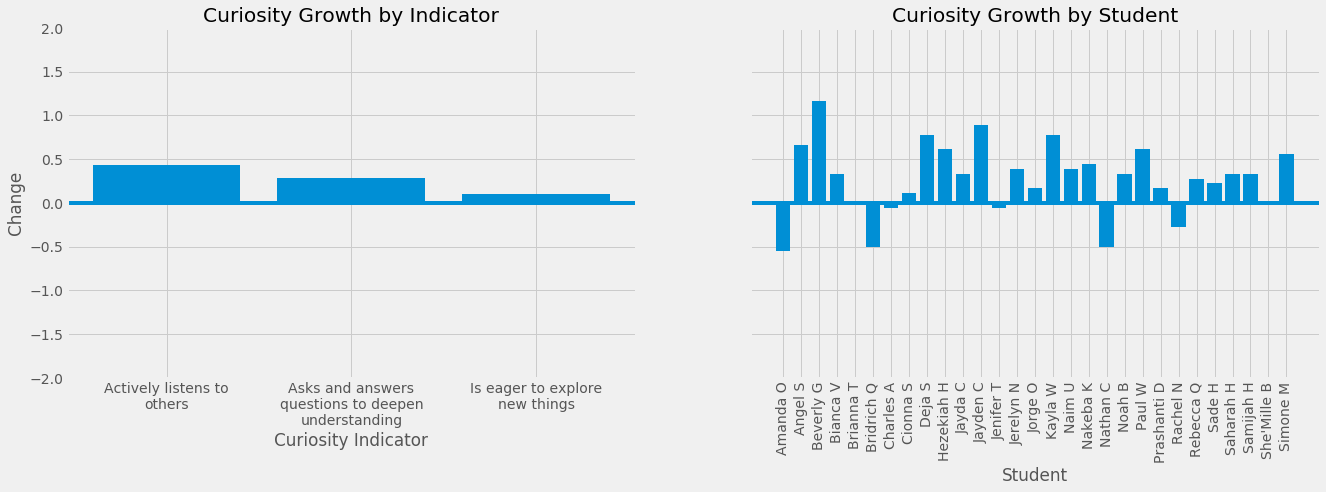

In [177]:
# Visualization of the growth from the beginning of the year to the end

df_initial = curiosity_df[curiosity_df.date == '2019-11-15'].groupby(['name','indicator']).agg({'score':np.mean})
df_initial = df_initial.rename(columns={'score':'initial_score'})
df_final = curiosity_df[curiosity_df.date == '2020-03-15'].groupby(['name','indicator']).agg({'score':np.mean})
df_final = df_final.rename(columns={'score':'final_score'})
df_growth = pd.merge(df_initial, df_final, on=['name','indicator'])
df_growth['delta'] = df_growth.final_score - df_growth.initial_score
df_growth2 = df_growth.groupby('indicator').agg({'delta':np.mean})

df_growth3 = df_growth.groupby('name').agg({'delta':np.mean})

indicators = df_growth2.index
indicators = [ '\n'.join(wrap(i,20)) for i in indicators]
x0 = np.arange(3)
width = 0.8

fig, (ax0, ax1) = plt.subplots(nrows = 1, ncols=2, sharey=True, figsize = (20,6))
ax0.bar(x0, df_growth2.delta, width)
ax0.set_ylim([-2,2])
ax0.set(title='Curiosity Growth by Indicator', xlabel = 'Curiosity Indicator', ylabel = 'Change')
ax0.set_xticks(x0)
ax0.set_xticklabels(indicators, wrap = True)
ax0.axhline(y = 0)

ax1.bar(df_growth3.index, df_growth3.delta, width)
ax1.set(title='Curiosity Growth by Student', xlabel = 'Student')
ax1.set_xticklabels(df_growth3.index, rotation = 90)
ax1.axhline(y = 0)
plt.show()




In [ ]:
##

## Teaching Context

## Data Analysis for All Students

In [4]:
character_df.head()

,name,date,character_trait,indicator,evaluator,score
0,Charles A,2019-11-15,Curiosity,Is eager to explore new things,Student,4
1,Noah B,2019-11-15,Curiosity,Is eager to explore new things,Student,4
2,She'Mille B,2019-11-15,Curiosity,Is eager to explore new things,Student,5
3,Nathan C,2019-11-15,Curiosity,Is eager to explore new things,Student,4
4,Jayden C,2019-11-15,Curiosity,Is eager to explore new things,Student,3


In [5]:
academic_df.head()

,name,standard,mastery
0,Charles A,Limits.1B.Estimate,1.0
1,Noah B,Limits.1B.Estimate,1.0
2,She'Mille B,Limits.1B.Estimate,1.0
3,Nathan C,Limits.1B.Estimate,1.0
4,Jayden C,Limits.1B.Estimate,1.0


In [6]:
standard_df.head()

,standard,total questions,total points
0,Limits.1A.Symbol,0,0
1,Limits.1B.Estimate,1,1
2,Limits.1C.Determine,6,7
3,Limits.1D.Behavior,3,3
4,Limits.2A.Continuity,2,3


In [8]:
students_df.head()

,name,period,previous_course,previous_course_grade
0,Beverly G,1,AP Calculus AB,90
1,Brianna T,1,AP Calculus AB,87
2,Bridrich Q,1,Pre-AP Calculus,76
3,Cionna S,1,AP Calculus AB,90
4,Deja S,1,Pre-AP Calculus,79


,name,period,previous_course,previous_course_grade
0,Beverly G,1,AP Calculus AB,90
1,Brianna T,1,AP Calculus AB,87
2,Bridrich Q,1,Pre-AP Calculus,76
3,Cionna S,1,AP Calculus AB,90
4,Deja S,1,Pre-AP Calculus,79


## Data Analysis for Subgroups of Students

## Data Analysis for One Student

## Data Analysis for Character Results

## Next Steps from Analyses of Academic and Character Data

Title
